-batch : 전체 데이터를 한꺼번에 학습시키는 방법

-mini batch : 전체 데이터를 mini batch 단위로 나누어서 학습시키는 방법

In [1]:
from sklearn.datasets import make_blobs
# 샘플갯수 n_samples
X, y = make_blobs(n_samples=150000, cluster_std=[1.0, 2.5, 0.5], random_state=170)

In [3]:
from sklearn.cluster import KMeans
# 기본모형
model1 = KMeans(n_clusters=3).fit(X)

In [4]:
# 미니배치를 적용한 모형(속도가 더 빠름)
# 데이터를 미니배치 크기만큼 무작위로 분리하여 처리
from sklearn.cluster import MiniBatchKMeans
model2 = MiniBatchKMeans(n_clusters=3, batch_size=1536).fit(X)

In [6]:
from sklearn.metrics.cluster import silhouette_score
silhouette_score(X[:10000], model1.predict(X[:10000]))

0.6486891952788992

In [7]:
from sklearn.metrics.cluster import silhouette_score
silhouette_score(X[:10000], model2.predict(X[:10000]))

0.6486370017555688

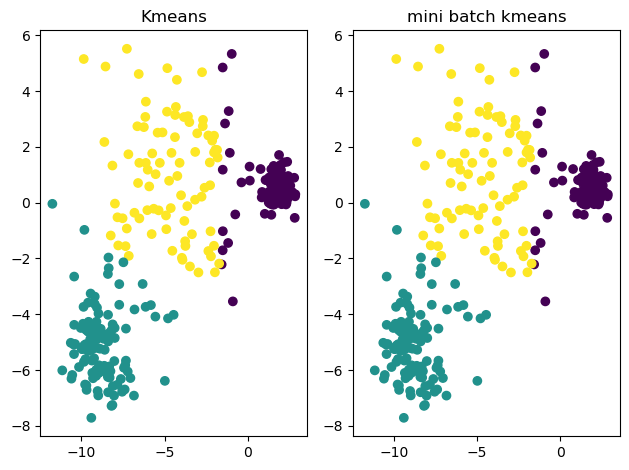

In [5]:
import matplotlib.pyplot as plt
import numpy as np
idx = np.random.randint(150000, size=300)
plt.subplot(121)
plt.scatter(X[idx, 0], X[idx, 1], c=model1.labels_[idx])
plt.title("Kmeans")
plt.subplot(122)
plt.scatter(X[idx, 0], X[idx, 1], c=model2.labels_[idx])
plt.title("mini batch kmeans")
plt.tight_layout()
plt.show()
# 결과는 큰 차이가 없음